In [34]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import librosa
from librosa import display
import csv
import os
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from keras import models
from keras import layers
import keras
from matplotlib import pyplot
import IPython.display as ipd
import random
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Общие настраеваемые параметры модели

Определяем наличие готовых данных в формате CSV. 
Указываем название CSV файла. 
Определяем директорию с датасетом. 
Указываем относительный размер валидационного и тестировочного датасета.  
Определяем словарь с именами спикеров. 

In [35]:
LOAD_FROM_CSV = True
CSV_NAME = "recordings.csv"
RECORDINGS_FOLDER = "all_recordings"
VALIDATION_SIZE = 0.3
TEST_SIZE = 0.3


SPEAKERS = {"George" : 0,
            "Jackson" : 1,
            "Lucas" : 2,
            "Nicolas" : 3,
            "Theo" : 4,
            "Yweweler" : 5}

# Случайная проверка целостности файла

Название файла: 8_nicolas_38.wav


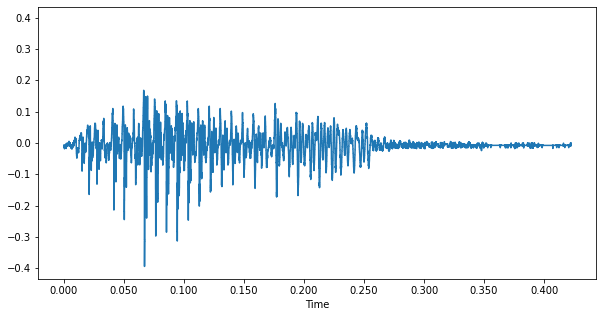

In [36]:
random_sample = random.choice(os.listdir(RECORDINGS_FOLDER))
print(f"Название файла: {random_sample}")


y, sr = librosa.load(f"{RECORDINGS_FOLDER}/{random_sample}")
fig, ax = plt.subplots(sharex=True)
fig.set_size_inches(10,5)
librosa.display.waveshow(y, sr=sr)

ipd.Audio(f"{RECORDINGS_FOLDER}/{random_sample}", rate=sr, )

# Представляем данные в виде Pandas DataFrame

In [37]:
def extract_information(data_folder: str, extract_file_name: str):
    columns = ["file", "chroma_stft", "rmse", "spectral_centroid", "spectral_bandwith", "rollof", "zero_crossing_rate"]
    for i in range(1,21):
        columns.append(f"mfcc{i}")
    data = pd.DataFrame(columns=columns)
    for file in os.listdir(data_folder):
        number = f"{data_folder}/{file}"
        y, sr = librosa.load(number, mono=True, duration=30)
        y, index = librosa.effects.trim(y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        spectral_bandwith = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        file_parameters = [file, np.mean(chroma_stft), np.mean(rmse), np.mean(spectral_centroid), np.mean(spectral_bandwith), np.mean(rolloff), np.mean(zero_crossing_rate)]
        for i in mfcc:
            file_parameters.append(np.mean(i))
        data.loc[len(data)] = file_parameters
    data.to_csv(extract_file_name, sep='\t', encoding='utf-8', index = False)
    return data



if LOAD_FROM_CSV:
    data = pd.read_csv(CSV_NAME, sep="\t")
else:
    data = extract_information("all_recordings", extract_file_name = CSV_NAME)

data




,file,chroma_stft,rmse,spectral_centroid,spectral_bandwith,rollof,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0_george_0.wav,0.198667,0.083719,1389.432001,1122.693199,2620.425180,0.060171,-312.48383,157.41385,-83.389450,47.328335,47.099693,-55.105373,-13.754276,-17.003675,-52.974422,-11.805694,-24.018995,-43.016975,2.110411,-6.013774,-28.540850,-3.117069,-5.603108,-13.659479,-2.320226,-12.169437
1,0_george_1.wav,0.273889,0.042972,1034.395917,974.723142,2113.980807,0.046744,-379.06635,165.66690,-57.867474,22.860203,25.974346,-46.115276,-14.100521,-26.140167,-52.515860,-9.250536,-19.969303,-40.412582,-2.325323,-6.705203,-25.866652,-7.142958,-10.470287,-16.260077,-5.955035,-14.368776
2,0_george_10.wav,0.342532,0.032147,1269.075083,1003.382474,2388.227983,0.076956,-424.77246,127.85210,-53.795578,17.831009,26.846817,-34.200123,-14.209099,-18.696370,-32.358147,-5.272920,-23.223995,-34.547400,-1.589133,-11.633971,-23.948620,-0.723396,-4.458993,-10.715401,-1.525208,-11.829735
3,0_george_11.wav,0.255208,0.041286,1218.094283,1049.359689,2413.872070,0.062061,-389.58480,166.07352,-79.408005,25.375334,32.479534,-50.722202,-10.692026,-17.150023,-45.109356,-4.970866,-23.147620,-41.559254,-0.668476,-12.243627,-26.992030,1.255178,-5.872051,-13.653750,-2.406699,-15.252200
4,0_george_12.wav,0.222804,0.041336,1146.683549,994.639615,2244.836426,0.061479,-389.27470,169.63234,-77.210120,22.742558,36.415375,-46.292343,-13.345025,-17.793606,-43.902256,-5.215960,-21.835735,-41.768703,-1.458749,-10.668156,-28.250916,-1.996623,-7.960970,-16.239616,-3.517600,-17.073278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,9_yweweler_5.wav,0.374018,0.008558,985.559078,884.080353,1823.593140,0.058289,-539.95374,227.80104,-66.478615,1.908442,16.775307,-36.352470,18.748755,1.454089,-40.820858,11.788944,10.374135,-23.454926,2.178336,0.333495,-16.196772,-3.123700,-9.697893,-11.340939,1.610538,-8.898899
2996,9_yweweler_6.wav,0.408218,0.011599,1204.300650,911.623800,2174.853516,0.071094,-491.34430,227.61958,-87.590610,2.129326,22.445152,-49.015450,13.958400,14.732166,-36.356777,4.801534,11.993781,-14.578753,5.613831,0.955333,-12.609158,-2.106348,-12.828855,-10.495636,5.215742,-9.894784
2997,9_yweweler_7.wav,0.376584,0.008699,1070.728559,908.047852,1971.633911,0.052460,-511.85513,214.74998,-75.395140,1.426343,20.796366,-40.226170,10.569022,4.748950,-33.262833,8.161093,6.611096,-17.942572,2.736620,-5.966836,-16.471325,-2.094696,-15.326060,-16.683110,-1.763444,-13.693180
2998,9_yweweler_8.wav,0.352586,0.005564,1031.310462,940.535710,1887.145996,0.056478,-559.76250,231.91414,-70.128494,8.296725,18.100630,-42.547340,19.210257,9.212729,-33.308395,10.835041,7.000213,-17.065546,7.002769,-3.895181,-14.850399,1.386613,-11.851809,-10.300099,6.005344,-9.889004


# Проверим DataFrame на наличие NULL ячеек и на тип данных

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   file                3000 non-null   object 
 1   chroma_stft         3000 non-null   float64
 2   rmse                3000 non-null   float64
 3   spectral_centroid   3000 non-null   float64
 4   spectral_bandwith   3000 non-null   float64
 5   rollof              3000 non-null   float64
 6   zero_crossing_rate  3000 non-null   float64
 7   mfcc1               3000 non-null   float64
 8   mfcc2               3000 non-null   float64
 9   mfcc3               3000 non-null   float64
 10  mfcc4               3000 non-null   float64
 11  mfcc5               3000 non-null   float64
 12  mfcc6               3000 non-null   float64
 13  mfcc7               3000 non-null   float64
 14  mfcc8               3000 non-null   float64
 15  mfcc9               3000 non-null   float64
 16  mfcc10

# Выведем корреляционную матрицу для анализа параметров модели. Можем наблдать взаимоисключающюю корреляцию параметров "rollof" и "spectral_bandwith". В последствии откажемся от использования параметра "rollof"

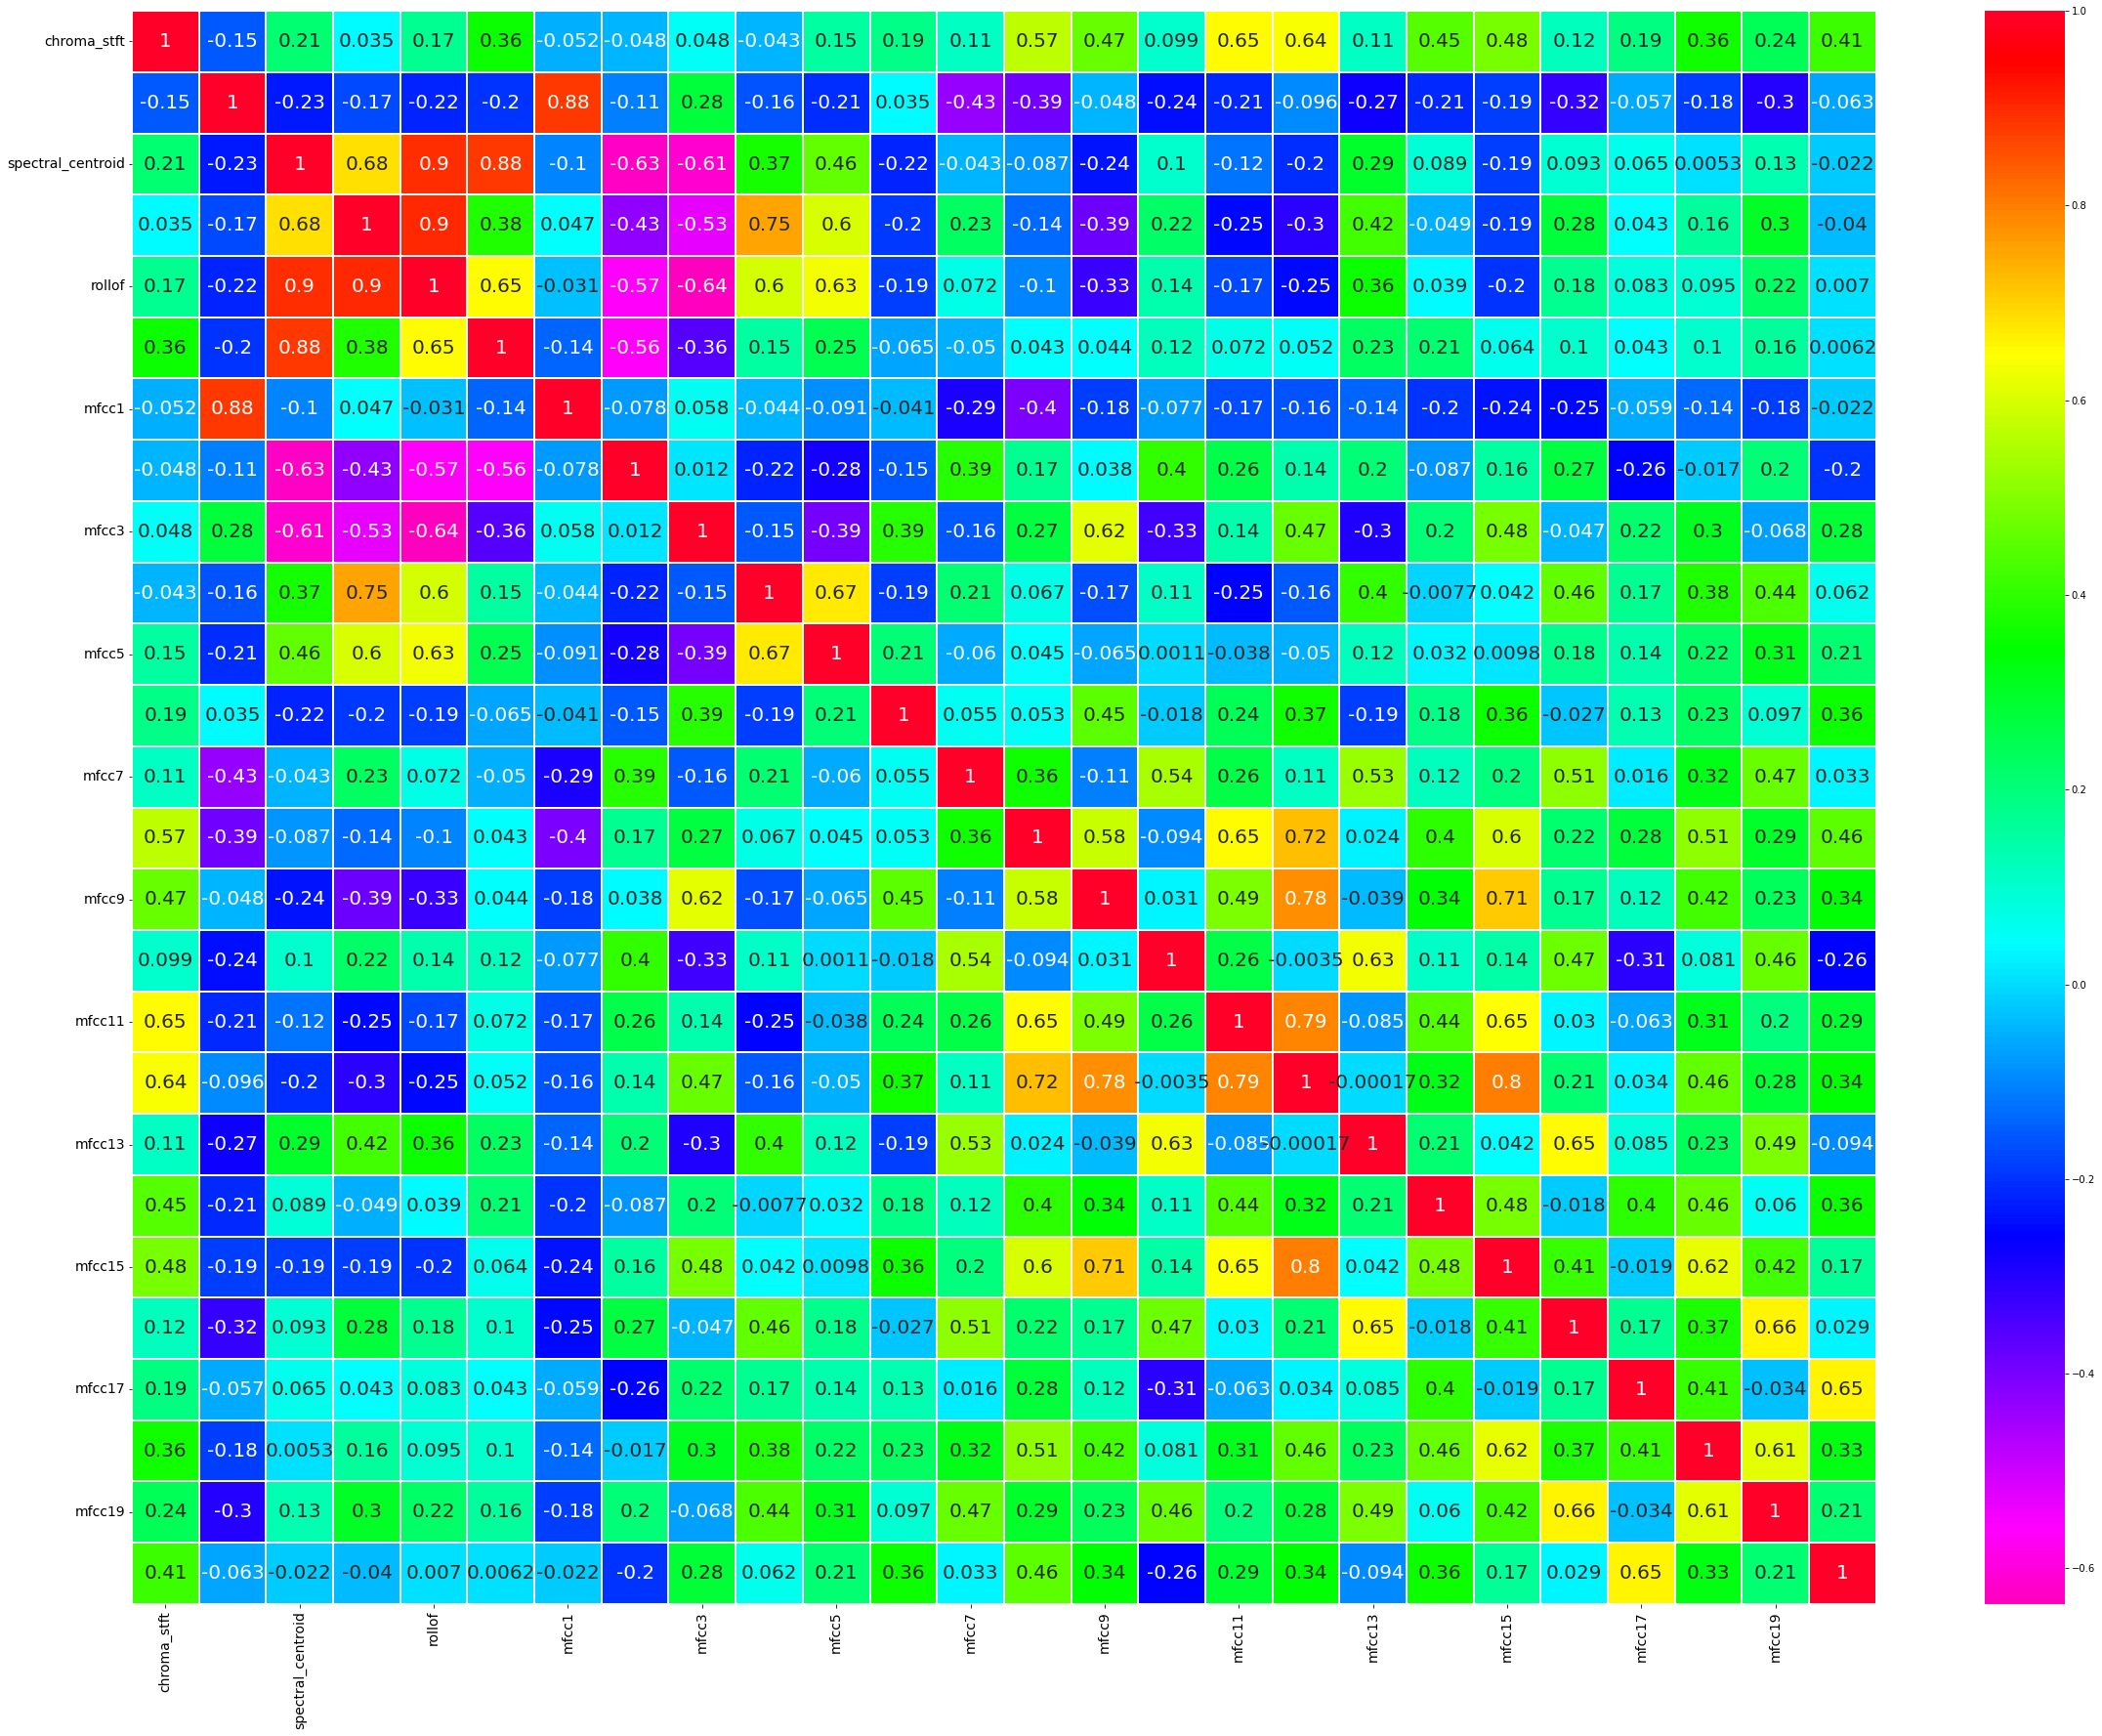

In [39]:
sns.heatmap(data.corr(), annot = True, cmap = "gist_rainbow_r", linewidths = 0.1, annot_kws = {"size" : 20})
fig = plt.gcf()
fig.set_size_inches(40,30)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

# Подготавливаем данные к кросс-валидации

In [40]:
def preprocessing(frame):
    speakers_prepared = []
    for i in range(len(frame["file"])):
        speakers_prepared.append(SPEAKERS[(frame["file"][i]).rpartition('_')[0].partition('_')[2].title()])
    frame["speaker"] = speakers_prepared
    return frame.drop(["file","rollof"],axis=1)

data = preprocessing(data).sample(frac=1)
data

,chroma_stft,rmse,spectral_centroid,spectral_bandwith,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,speaker
2785,0.395032,0.080025,933.468179,913.936248,0.047273,-310.04672,223.22678,-65.316580,23.144108,34.465057,-42.077610,1.110882,-1.718916,-33.470880,-2.033892,-6.041313,-15.479045,-2.415348,-19.178408,-13.026258,-0.074024,-19.673027,-9.537916,-2.131927,-21.327549,1
1551,0.398478,0.063315,973.010298,893.213744,0.056858,-297.35535,232.36575,-59.747640,5.600787,21.194954,-42.763900,-10.705338,-12.705813,-21.399029,21.063816,6.726946,-12.021511,-0.019484,-20.263298,-10.588258,8.789867,-23.919468,-15.916290,11.203815,-16.989326,1
815,0.370025,0.034107,1230.039401,916.885924,0.077789,-405.43774,170.43507,-56.831673,19.870459,28.413610,-33.941074,-0.298158,-8.394913,-33.820683,-10.505381,-27.541517,-27.785507,5.968212,-14.334935,-18.546574,7.083165,-10.488979,-10.914925,7.090292,-10.677088,4
329,0.325345,0.033688,1286.258011,1053.501675,0.070768,-369.15768,183.25080,-90.894780,-8.915915,13.964293,-38.131300,-3.360446,-20.620363,-38.595802,5.481950,-15.074637,-30.521229,3.126219,-18.903220,-29.731375,1.342529,-11.967106,-20.016272,-2.382691,-10.820205,0
93,0.325835,0.112336,671.931273,760.061640,0.033081,-304.20505,192.86633,-1.814431,23.583466,23.467243,-21.111784,-9.809112,-20.484644,-26.165236,-5.790109,-23.221329,-16.757220,13.373987,-8.030038,-15.132301,2.674749,-14.273561,-13.426793,2.593625,-14.569742,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.335981,0.052478,745.804253,776.980976,0.038164,-354.59260,236.97128,-29.182365,12.176408,20.957320,-38.133934,-3.197221,2.013697,-24.834370,1.104496,-3.293102,-23.207636,-1.925042,-1.278576,-11.434907,-3.631494,-11.204770,-9.211366,2.512538,-10.231599,1
2832,0.441869,0.040390,1011.388970,906.475904,0.055280,-390.92465,203.92671,-46.034557,19.454386,46.679646,-30.635931,-10.220888,9.716725,-20.742092,-5.867709,10.747573,-1.534502,-3.330826,-3.550446,-0.189414,1.044516,-13.496253,-8.713634,4.032897,-7.004566,2
773,0.231861,0.049531,862.432980,1094.929036,0.032271,-374.55148,182.82916,-37.925163,53.545200,33.215527,-32.642876,22.805174,2.847094,-29.771090,6.509606,-18.764868,-32.335040,3.069672,-12.578315,-13.340759,10.833112,-8.180244,-6.819326,8.776018,-6.123498,3
2036,0.354726,0.003438,1958.535468,1097.184293,0.176990,-578.44336,163.16132,-92.957760,38.975800,35.509890,-47.648712,15.337697,5.069749,-30.207952,12.754684,-7.564610,-23.921696,12.626908,-2.944352,-5.761020,14.545427,-10.002771,-5.872517,10.038652,-13.518646,4


# Разделяем данные на тренировочную, валидационную и тестировочную выборки, преобразуя данные в numpy array

In [41]:
from sklearn.model_selection import train_test_split

X = np.array(data.iloc[:,:-1], dtype=float)
y = np.array(data.iloc[:,-1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = VALIDATION_SIZE)

print(f"{y_train.shape}"
      f"{X_train.shape}"
      f"{y_val.shape}"
      f"{X_val.shape}"
      f"{y_test.shape}"
      f"{X_test.shape}")

(1470,)(1470, 25)(630,)(630, 25)(900,)(900, 25)


# Стандартизируем данные

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X=X_train)
X_val = scaler.fit_transform(X=X_val)
X_test = scaler.fit_transform(X=X_test)


# Определяем линейный стек слоёв. 3 слоя бинарной классификации и 1 слой мультиклассовой класификации. Используем Dropout для профилактики предотвращения оверфиттинга

In [43]:
model = models.Sequential()

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Компилируем модель

In [44]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Обучаем модель. Определяем переменную stopper для остановки обучения при отсутствии прогресса параметра "validation loss". 100 Эпох. Ограничиваем пакет входяших данных в модели в размере 100 единиц.

In [45]:
stopper = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=4,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False)

history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=100,
                    callbacks=[stopper])

Epoch 1/100
15/15 [==============================] - 0s 11ms/step - loss: 2.0828 - accuracy: 0.2755 - val_loss: 1.5066 - val_accuracy: 0.7968
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 1.4516 - accuracy: 0.5163 - val_loss: 0.7774 - val_accuracy: 0.9063
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.9169 - accuracy: 0.7014 - val_loss: 0.3113 - val_accuracy: 0.9619
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5756 - accuracy: 0.8048 - val_loss: 0.1581 - val_accuracy: 0.9698
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3774 - accuracy: 0.8857 - val_loss: 0.1080 - val_accuracy: 0.9762
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3012 - accuracy: 0.8993 - val_loss: 0.0923 - val_accuracy: 0.9778
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.2251 - accuracy: 0.9279 - val_loss: 0.0839 - val_accuracy: 0.9762
Epoch 8/100


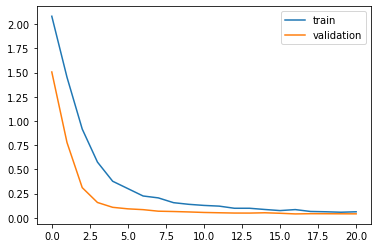

In [46]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

In [47]:
#Возвращает имя человека по цифровому ключу
def get_speaker(speaker):
    return {v:k for k,v in SPEAKERS.items()}.get(speaker)

#Возвращает предсказание модели по принимаемому датасету тестировочных данных
def print_prediction(X, y):
    print('\n# Generate predictions')
    for i in range(len(y)):
        prediction = get_speaker(np.argmax(model.predict(X[i:i+1])[0], axis=-1))
        speaker = get_speaker(y[i])
        print("y={0:10s}- prediction={1:10s}- match={2}".format(speaker, prediction, speaker==prediction))

#Возвращает отчёт по работе модели
def report(X, y):
    #Confution Matrix and Classification Report
    y_pred = np.argmax(model.predict(X), axis=-1)
    y_test_num = y.astype(np.int64)
    conf_mt = confusion_matrix(y_test_num, y_pred)
    print(conf_mt)
    plt.matshow(conf_mt)
    plt.show()
    print("Отчёт")
    target_names = ["George", "Jackson", "Lucas", "Nicolas", "Theo", "Yweweler"]

    print(classification_report(y_test_num, y_pred))

# Наглядная проверка работы модели на ограниченном тестировочном датасете

In [48]:
print("Наглядная проверка работы модели на ограниченном тестировочном датасете")
score = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
print_prediction(X_test[0:30], y_test[0:30])

Наглядная проверка работы модели на ограниченном тестировочном датасете
29/29 [==============================] - 0s 987us/step - loss: 0.0425 - accuracy: 0.9867
accuracy: 98.67%

# Generate predictions
y=Nicolas   - prediction=Nicolas   - match=True
y=Yweweler  - prediction=Yweweler  - match=True
y=Theo      - prediction=Theo      - match=True
y=Theo      - prediction=Theo      - match=True
y=George    - prediction=George    - match=True
y=Lucas     - prediction=Lucas     - match=True
y=Yweweler  - prediction=Yweweler  - match=True
y=Jackson   - prediction=Jackson   - match=True
y=Jackson   - prediction=Jackson   - match=True
y=Theo      - prediction=Theo      - match=True
y=George    - prediction=George    - match=True
y=Yweweler  - prediction=Yweweler  - match=True
y=Lucas     - prediction=Lucas     - match=True
y=Lucas     - prediction=Lucas     - match=True
y=Jackson   - prediction=Jackson   - match=True
y=George    - prediction=George    - match=True
y=Nicolas   - prediction=Nicol

# Отчёт классификации

Отчёт классификации

[[166   0   0   0   0   0]
 [  0 134   0   0   0   0]
 [  0   0 149   0   0   0]
 [  0   0   1 157   0   0]
 [  0   7   0   0 137   2]
 [  0   0   0   0   2 145]]


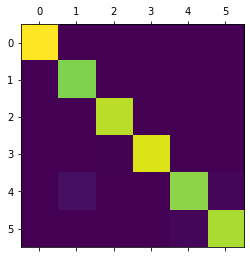

Отчёт
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           1       0.95      1.00      0.97       134
           2       0.99      1.00      1.00       149
           3       1.00      0.99      1.00       158
           4       0.99      0.94      0.96       146
           5       0.99      0.99      0.99       147

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900



In [49]:
print("Отчёт классификации\n")
report(X_test, y_test)